# Model evaluation using cross-validation

In [3]:
import pandas as pd
import numpy as np
np.set_printoptions(legacy='1.25')


In [4]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target_name = "class"
target = adult_census[target_name]
data = adult_census.drop(columns=target_name)

In [5]:
numerical_columns = ["age", "capital-gain", "capital-loss", "hours-per-week"]

data_numeric = data[numerical_columns]

We use the `make_pipeline` to combine the preprocessing and the estimator in every iteration of cross-validation

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())

### Why we need cross-validation

Before: single split into train and test
Disadvantages:
- random split -> we don't know how much the generalization performance varies
- when we do not have a lot of data, splitting the data means even smaller amount of data for training and testing, yielding an even more noisy (single) measure of generalization performance

Cross-validation:
- repeats training procedure such that the train and test sets are different each time
- in each repetition, we measure the generalization performance
- then, we aggregate them: mean and variability -> can assess them empirically


A popular CV strategy is k-fold strategy: split dataset into `k` partitions where
- `k-1` partitions are used to train the model
- `1` partition to score

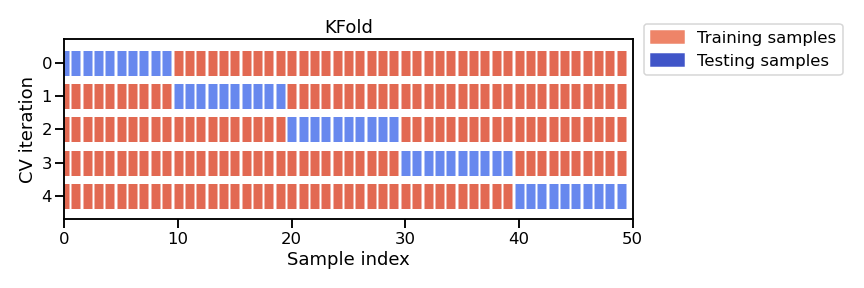

Computationally intensive b/c we train several models, not just one.

### Using cross-validation in sklearn

In [7]:
from sklearn.model_selection import cross_validate

In [11]:
model = make_pipeline(StandardScaler(), LogisticRegression())
cv_result = cross_validate(model, data_numeric, target, cv=5)
cv_result

{'fit_time': array([0.06432772, 0.06882405, 0.06926489, 0.06519866, 0.0647943 ]),
 'score_time': array([0.01374388, 0.01247406, 0.01232672, 0.01183677, 0.01194644]),
 'test_score': array([0.79557785, 0.80049135, 0.79965192, 0.79873055, 0.80456593])}

Explain the output of `cross_validate`
- time to train and predict
- default score on testing data in each fold


Note that models fitted are discarded. In a pipeline of training and evaluating models, we would choose the best according to CV, and then train one model on the full dataset.


We can check the variability of the generalization performance.

In [13]:
scores = cv_result["test_score"]
scores_mean = scores.mean()
scores_std = scores.std()
print(f"The mean cross-validation accuracy is: {scores_mean:.3f} +/- {scores_std:.3f}")


The mean cross-validation accuracy is: 0.800 +/- 0.003



# Exercise: Recap fitting a scikit-learn model on numerical data
#### 1. Why do we need two sets: a train set and a test set?

a) to train the model faster
b) to validate the model on unseen data
c) to improve the accuracy of the model

Select all answers that apply

Answers: (b)

#### 2. The generalization performance of a scikit-learn model can be evaluated by:

a) calling fit to train the model on the training set, predict on the test set to get the predictions, and compute the score by passing the predictions and the true target values to some metric function
b) calling fit to train the model on the training set and score to compute the score on the test set
c) calling cross_validate by passing the model, the data and the target
d) calling fit_transform on the data and then score to compute the score on the test set

Select all answers that apply

(a), (c)

#### 3. When calling `cross_validate(estimator, X, y, cv=5)`, the following happens:

a) X and y are internally split five times with non-overlapping test sets
b) estimator.fit is called 5 times on the full X and y
c) estimator.fit is called 5 times, each time on a different training set
d) a Python dictionary is returned containing a key/value containing a NumPy array with 5 scores computed on the train sets
e) a Python dictionary is returned containing a key/value containing a NumPy array with 5 scores computed on the test sets

Select all answers that apply

(a), (c), (E)

#### 4. (optional) Scaling
We define a 2-dimensional dataset represented graphically as follows:
![](https://i.imgur.com/muvSbI6.png)

Question

If we process the dataset using a StandardScaler with the default parameters, which of the following results do you expect:

![](https://i.imgur.com/t5mTlVG.png)


a) Preprocessing A
b) Preprocessing B
c) Preprocessing C
d) Preprocessing D

Select a single answer

(b)

#### 5. (optional) Cross-validation allows us to:

a) train the model faster
b) measure the generalization performance of the model
c) reach better generalization performance
d) estimate the variability of the generalization score

Select all answers that apply

(b), (d)
